In [133]:
from PIL import ImageFont, ImageDraw ,Image
import cv2, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


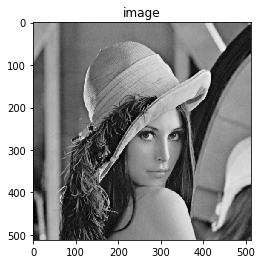

In [14]:

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
image = cv2.imread('./OpenCV/Lena.png',0)
imshow("image", image)

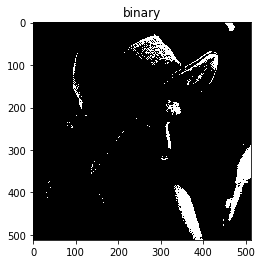

In [6]:
thr, mask = cv2.threshold(image, 
    180, 255, cv2.THRESH_BINARY)
imshow("binary", mask)

### 블러링후 이진화
가우시안 블러링후 이진화를 하면 잡음이 많이 제거된다


단점: 블러링을 많이 줄수록 계산량이 많아진다.
ex) 커널이 21이면 한픽셀을 계산하기 위해서 21번 연산을 해야한다

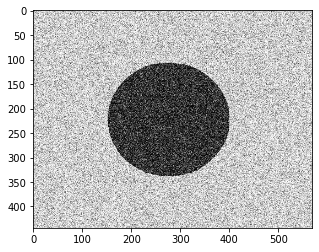

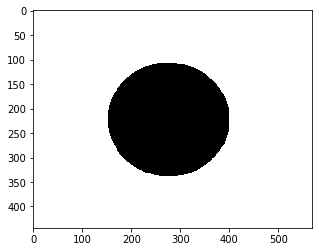

In [17]:
image = cv2.imread('./OpenCV/circle.png',0)
imshow("",image)
img_blur = cv2.GaussianBlur(image,(21,21),0)
_,binary = cv2.threshold(img_blur,127,255,cv2.THRESH_BINARY) # 50보다 작은건 0 나머지는 255
imshow("",binary)

### 사각형 이진화
써클과의 차이는 써클은 배경과 전경의 대비가 강해서 역치값을 대충 결정해도 분류가 잘되고 
사각형은 대비가 강하지 않아서 잘 설정해야한다

(100.0, array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8))


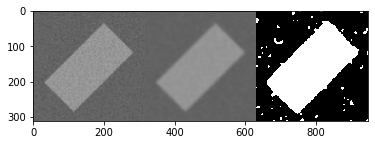

In [36]:
image = cv2.imread('./OpenCV/boxnoise.png',0)

img_blur = cv2.GaussianBlur(image,(21,21),0)
out = cv2.threshold(img_blur,100
                    ,255,cv2.THRESH_BINARY) # 50보다 작은건 0 나머지는 255

#
print(out) # out은 튜플타입이다.
imshow("",np.hstack([image,img_blur,out[1]]))

### 역치값 정하기
히스토그램 확인을 통해서 역치값을 확인 할수 있다. 
전경과 배경의 분포다 다르게 나오는 지점을 역치값으로 설정

(311, 316)


''

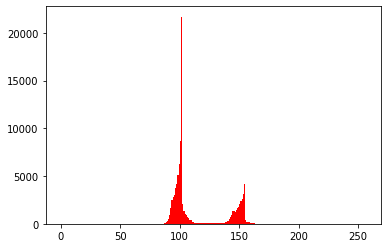

In [68]:
### 히스토그램으로 사각형과 원 binary 해보기
image = cv2.imread('./OpenCV/boxnoise.png', cv2.IMREAD_GRAYSCALE)
print(image.shape)
#311, 316
plt.hist(image.ravel(), 256, [0,256], color='r')
''''''# 마지막에 나오는 값 출력안함

(128.0, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))


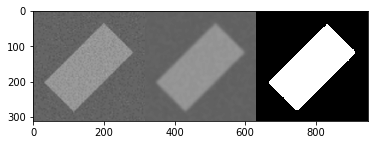

In [73]:
image = cv2.imread('./OpenCV/boxnoise.png',0)
img_blur = cv2.GaussianBlur(image,(21,21),0)

# otsu 알고리즘 적용, 값을 0으로 주었음에도 불구하고 역치값을 잘찾아준다.
out = cv2.threshold(img_blur,128
                    ,255,cv2.THRESH_BINARY) 


print(out) # out은 튜플타입이다.
imshow("",np.hstack([image,img_blur,out[1]]))

### otsu 적용

(122.0, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))


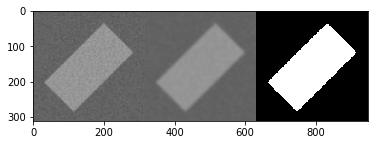

In [37]:
image = cv2.imread('./OpenCV/boxnoise.png',0)
img_blur = cv2.GaussianBlur(image,(21,21),0)

# otsu 알고리즘 적용, 값을 0으로 주었음에도 불구하고 역치값을 잘찾아준다.
out = cv2.threshold(img_blur,0
                    ,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU) 


print(out) # out은 튜플타입이다.
imshow("",np.hstack([image,img_blur,out[1]]))

### 분포가 여러개인 이미지 OTSU알고리즘 적용하기


(121.0, array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255,   0]], dtype=uint8))


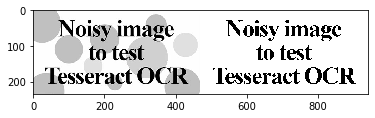

In [77]:
image = cv2.imread('./ocr.png',0)
img_blur = cv2.GaussianBlur(image,(21,21),0)


out = cv2.threshold(image,0
                    ,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU) 

imshow("",np.hstack([image,out[1]]))

히스토그램 확인

(235, 470)


''

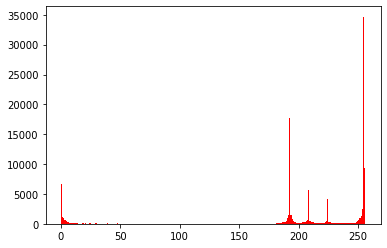

In [72]:
# 0은 gray scale로 읽어오는것 배경하고 전경을 분리하기 위해서 색영역을 줄인다??
image = cv2.imread("ocr.png", 0 )
print(image.shape)
plt.hist(image.ravel(), 256, [0,256], color='r')
''''''

(50.0, array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))


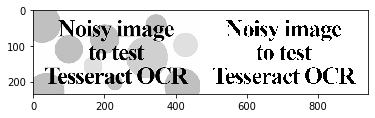

In [74]:
image = cv2.imread('./ocr.png',0)
#노이즈가 없는 영상에서 가우시안 블러는 영상의 에지를 손상시킨다.
#img_blur = cv2.GaussianBlur(image,(21,21),0)

out = cv2.threshold(image,50
                    ,255,cv2.THRESH_BINARY) 


print(out)
imshow("",np.hstack([image,out[1]]))

### otsu 풀수없는 문제 
global 역치값 때문에 풀수 없다 
지역적으로 여러 역치값을 설정해야한다

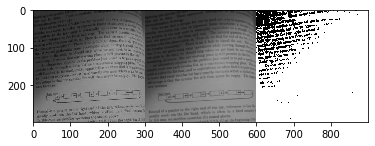

''

In [81]:
image = cv2.imread('./OpenCV/text.jpg',0)

img_blur = cv2.GaussianBlur(image,(3,3),0)

out = cv2.threshold(image,50
                    ,255,cv2.THRESH_BINARY) 
imshow("",np.hstack([image,img_blur,out[1]]))
''''''

여러 역치 값을 설정하는 알고리즘

블록으로 분할을 하고 블록의 평균을 구해서 평균보다 작면 배경 평균보다 크면 전경

21 : 21 by 21 블록으로 분할

0 :평균에서 얼마나 뺄지 

평균구하기
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 가우시안 평균사용 
:산술 평균사용

255: 나머지 배경색



(300, 300)


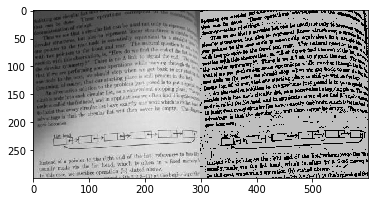

''

In [92]:
image = cv2.imread('./OpenCV/text.jpg',0)
print(image.shape)
# 노이즈가 있는 건 아니라서 구지 블러링을 할필요없다.
#img_blur = cv2.GaussianBlur(image,(3,3),0)
binary = cv2.adaptiveThreshold(image,127,
                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,21,2)
                    
imshow("",np.hstack([image,binary]))
''''''

(300, 225)


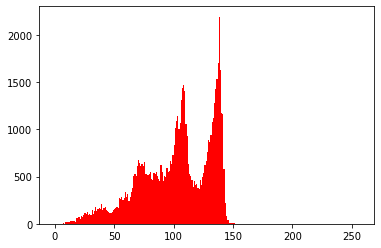

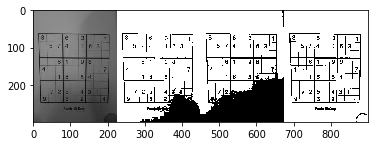

[[255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255 255]]


In [110]:
image = cv2.imread('./OpenCV/grid.jpg',0)
print(image.shape)
# 노이즈가 있는 건 아니라서 구지 블러링을 할필요없다.
#img_blur = cv2.GaussianBlur(image,(3,3),0)

#직접하기
plt.hist(image.ravel(), 256, [0,256], color='r')
plt.show()
_,binary = cv2.threshold(image,70 ,255,cv2.THRESH_BINARY) 

_,ocsu = cv2.threshold(image,0 ,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU) 


adaptive = cv2.adaptiveThreshold(image,255,
                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,21,5)
                    
imshow("",np.hstack([image,binary, ocsu,adaptive]))
# 영상 실제값으로 보기 -> 영상이 작게나오면 잘안본것이므로 직접 확인한다.
cv2.imwrite("output.jpg",adaptive)
print(adaptive)

그림보기
<img scr = "output.jpg">

In [ ]:
# 영수증 , 블러링(가우시안, 미디안블러), adaptiveThreshold 적용해서 해보기

# 

 ### 이진영상에서 외관선을 찾아 shape 맞추기

(584, 898)


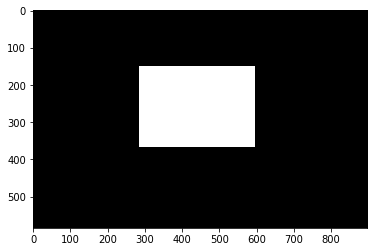

In [114]:
#외관선을 나타낼수 있는 중요정보만 찾아준다.
image = cv2.imread('./OpenCV/shape4.png',0)
print(image.shape)

_,mask = cv2.threshold(image,0 ,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
imshow("",mask)
'''
cv2.RETR_EXTERNAL 외곽선이 두개일떄 하나만 찾는다.

cv2.CHAIN_APPROX_SIMPLE 가장간단한 외곽선 찾는위치
'''
contours,  _ = cv2.findContours(mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

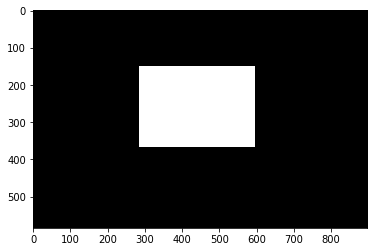

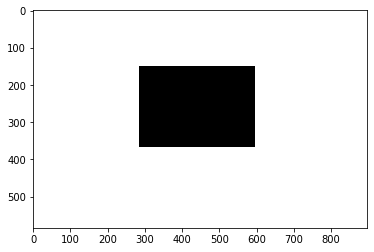

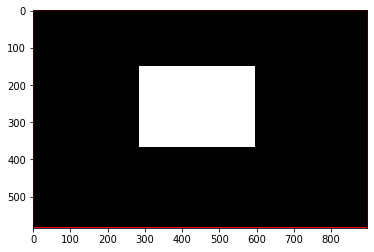

In [117]:
img = cv2.imread('./OpenCV/shape4.png', 0)
thr, mask = cv2.threshold(img, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("",mask)
mask = 255 - mask
imshow("", mask)
contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread('./OpenCV/shape4.png')
cv2.drawContours(image, contours, -1, (0, 0, 255), 2)
imshow("", image) 

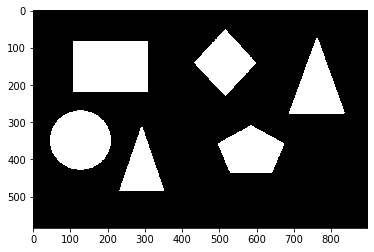

shape = 6
shape = 240
shape = 300
shape = 226
shape = 4
shape = 298
shape = 56


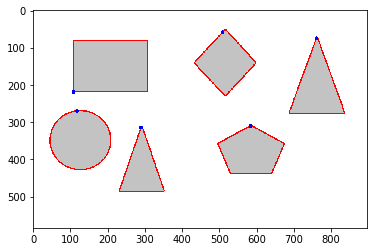

In [120]:
img = cv2.imread('./OpenCV/shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask
imshow("", mask)
contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(  f"shape = {len(contours)}"  )

for con in contours :
    print(  f"shape = {len(con)}"  )
    #x = con[1][0][0]
    #y = con[1][0][1]    
    p = tuple(con[1][0])
    cv2.drawContours(img, [con], -1, (0, 0, 255), 2)
    cv2.circle(img, p, 5, (255,0,0), -1)
imshow("", img)

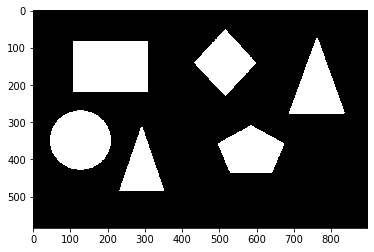

shape = 6
shape = 240 length =513.7056245803833  approx=3 
shape = 300 length =515.9310202598572  approx=5 
shape = 226 length =531.8721435070038  approx=8 
shape = 4 length =672.0  approx=4 
shape = 298 length =616.7178171873093  approx=3 
shape = 56 length =493.0336227416992  approx=4 


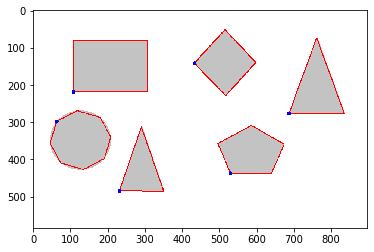

In [127]:
img = cv2.imread('./OpenCV/shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask
imshow("", mask)
contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(  f"shape = {len(contours)}"  )

for con in contours :
    #con의 길이를 구함 TRUE -폐곡선의 길이를 구함
    peri = cv2.arcLength(con,True)
    #전체 길이의 2%의 점을 찾겠다 con의 점이 68 개였다면 훨씬 줄어든다.
    # 10로 주면 값이 크게 뭉쳐짐 보통 0.02로 줌
    approx = cv2.approxPolyDP(con,0.02* peri, True)
    
    
    print(  f"shape = {len(con)} length ={peri}  approx={len(approx)} ")
    #x = con[1][0][0]
    #y = con[1][0][1]    
    p = tuple(approx[1][0])
    cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)
    cv2.circle(img, p, 5, (255,0,0), -1)
imshow("", img)

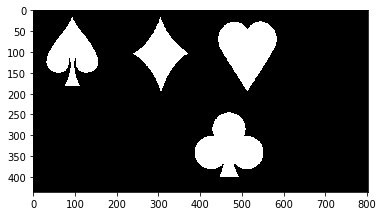

shape = 4
shape = 261 length =632.3574252128601  approx=16 
shape = 254 length =517.9554055929184  approx=9 
shape = 279 length =648.0559095144272  approx=12 
shape = 228 length =480.8254644870758  approx=8 


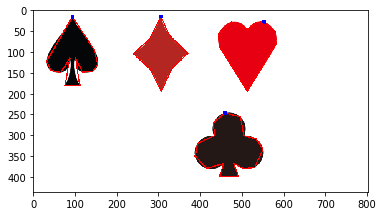

In [162]:
img = cv2.imread('./card.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask
imshow("", mask)
contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(  f"shape = {len(contours)}"  )

result =[]
ptr =[]
for con in contours :

    peri = cv2.arcLength(con,True)
    approx = cv2.approxPolyDP(con,0.013* peri, True)
    result.append(len(approx))
    p = tuple(approx[0][0])
    ptr.append(p)
    cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)
    cv2.circle(img, p, 5, (255,0,0), -1)
    print(  f"shape = {len(con)} length ={peri}  approx={len(approx)} ")

    
font = ImageFont.truetype("H2GTRM.TTF",20)   
imgPIL = Image.fromarray(cv2.cvtColor(img,  cv2.COLOR_BGR2RGB))    
draw = ImageDraw.Draw(imgPIL)

for i,cnt in enumerate(result):
    p=ptr[i]
    if cnt == 9:
        draw.text((p[0],p[1]) , "스페이스", font = font, fill = (255,0,0))
    elif  cnt == 8:
        draw.text((p[0],p[1]) , "다이아", font = font, fill = (255,0,0))
    elif  cnt == 12:
        draw.text((p[0],p[1]) , "클로바", font = font, fill = (255,0,0))
    elif cnt == 16:
        draw.text((p[0],p[1]) , "하트", font = font, fill = (255,0,0))

imshow("", img)
imgPIL.save("out.jpg")

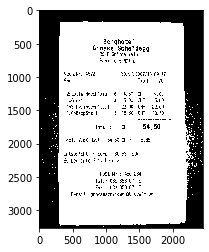

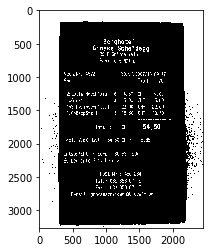

shape = 1


In [170]:
img = cv2.imread('./grosse.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imshow("", mask)
mask = 255 - mask
imshow("", mask)
contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(  f"shape = {len(contours)}"  )

### 동전개수 세기

아래 이미지는 이진화는 잘되지만, 컨투어를 따면 연결된 도형이 된다. 

띄어내는 방법 
 * 침식 -> 주변이 줄어들음 약간 붙어있는 부분이 없어진다 약한 연결부의 부분들을 연결을 끊는 방법 침식을 많이 시키면 센터만 남는다 조금시키면 붙어있는 부분의 연결이 끊어진다
 * 팽창 -> 비어있는 부분이 뭉쳐진다.

### open close

 * open : 침식을 하고 팽창 시키는 연산
     침식후에 노이즈를 제거하고 작아지는 크기를 팽창으로 늘린다.
 
 * close : 팽창을 하고 침식 시키는 연산 
     팽창후 홀을 매꾸고 커지는 연산을 침식으로 줄인다 
     
두 연산 모두 사이즈가 변하지 않는다는 것
binary 연산을 기준으로 한다 침식하는 부분은 흰색 영역에서 적용된다 . 
2차원 마스크에서 십자가 모양에 해당하는 흰색부분은 검정색으로 바꾼다


 

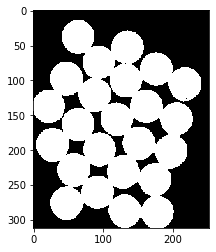

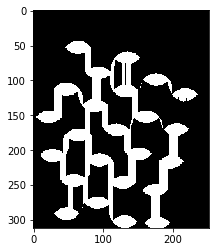

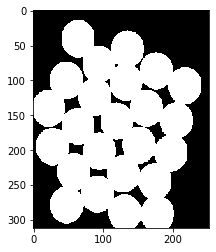

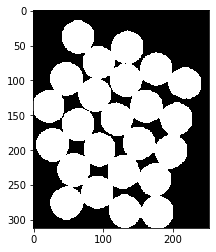

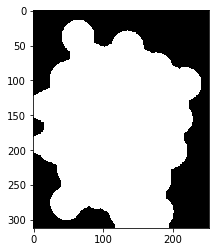

In [183]:
img = cv2.imread('./OpenCV/water_coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


thr, binary = cv2.threshold(gray, 127, 255,
        cv2.THRESH_BINARY)
mask=255-binary
imshow("",mask)

#팽창 구멍들을 매꾸는 것 
eroded = cv2.morphologyEx(mask,cv2.MORPH_ERODE,(3,3),iterations =30) 
imshow("",eroded)
#이미지, 침식하겠다. 필터사이즈, 반복횟수
dilate = cv2.morphologyEx(mask,cv2.MORPH_DILATE,(3,3),iterations =5) 
imshow("",dilate)

#팽창 구멍들을 매꾸는 것 
opened = cv2.morphologyEx(mask,cv2.MORPH_OPEN,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    
                          ,iterations =5) 
imshow("",opened)

#이미지, 침식하겠다. 필터사이즈, 반복횟수
closed = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
                          ,iterations =5) 
imshow("",closed)




### 동전 컨투어


 >> 노이즈가 있기때문에 노이즈를 제거하기 위해서 블러링
 밝고 어두운 부분이 있기때문에 adativetr로 이진화
 255를 빼지말고 threshold구할때 binary_inv 를 붙이면 된다
 배경이 밝기 때문에 오브젝트가 검정색 배경이 흰색이 된다
 shape가 이상하게 나옴, 동전의 전체부분이 전경이 되지 않고 가운대 부분이 배경이됨 
 동전의 가운대 부분이 밝은 부분으로 보였기 떄문.


>>가운데 부부분을 매꿀려면 close 연산을 취한다 동전안의 잔 노이즈들을 구멍을 매꾸다보면
뭉쳐진다
기본 커널이 십자가인대 전체 111,111,111 -> 팽창영역을 넓게 한다.
external : 외부에 있는 점들만 뽑는다은 사각형 영역을 다 뭉친다는 뜻
잔 노이즈의 컨투어들이 안나올수 있다. interation을 많이하면 동그라미가 연결되기 때문에 적절히 선택해야한다

>컨투어를 찾은 개수만큼 루프를 돌면서 컨투어의 면적을 계산한다. 면적이 2000보다 작거나 4000보다 크면은 
관심대상이 아니기떄문에 제외시킨다.
점의 개수가 5개밖에 없으면 원이 아니라는 것(원은 점이 많을 수밖에 없는대 점이 적으면)
fitEllipse(cnt) :주어진 점을 가지고 타원으로 매핑시키는 함수, 장축과 단축을 찾아 타원을 그려줌
fit써클() : 동그라미를 그림

>조건을 빼고 threshold만 하게 되면 노이즈를 컨투어로 인식할수있고 외부 노이즈에 민감하게 반응할수이싿
실제로는 에러가 발생했는저 노이즈 사이즈가 작아서 컨투어의 점의 개수가 작아서 타원으로 매핑
하지 못했기때문

>겹쳐있는 동전은 컨투로 찾는 방법이 아니다.

>사용되는 영역 
의료영상

* gray 컬러는 왜가지고 있지용?

* 동전의 가운데 부분이 검정색인대 컨투어가 점을 찾지 않나요? ->옵션 설정때문에 
  안쪽부분만 땀


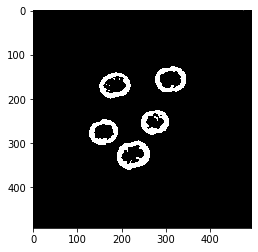

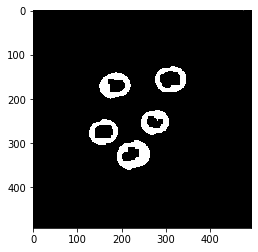

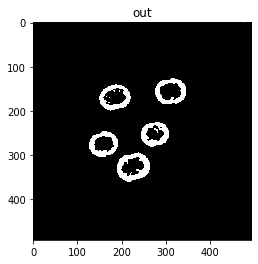

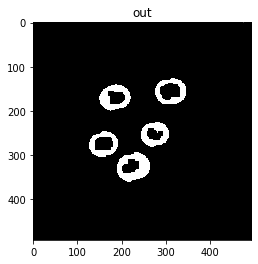

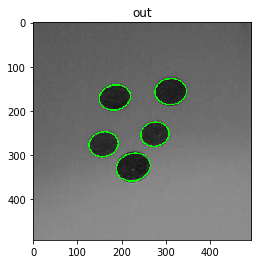

In [186]:
frame = cv2.imread("./OpenCV/coin.png")
roi = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 45, 6)

imshow("", thresh)
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh,
                          cv2.MORPH_CLOSE,
                          kernel,
                          iterations=5)
imshow("", closing)
cont_img = closing.copy()
contours, _ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0,255,0), 2)
    
imshow("out", thresh)
imshow("out", cont_img)
imshow("out", roi)



### 영수증 컨투어

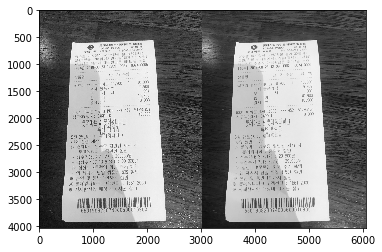

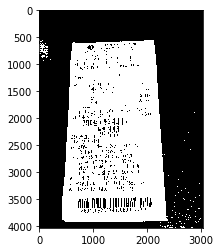

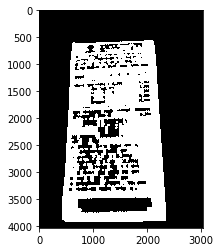

1


In [231]:
frame = cv2.imread("mart2.jpg")
roi = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

gray_blur = cv2.medianBlur(gray, 9)
#gray_blur = cv2.GaussianBlur(gray, (7,7), 0)

imshow("",np.hstack([gray, gray_blur]))
'''
thresh1 = cv2.adaptiveThreshold(gray_blur, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 45, 6)
imshow("",thresh1)
'''

thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)


imshow("",mask)
#침식후 팽창
opened = cv2.morphologyEx(mask,cv2.MORPH_OPEN,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    
                          ,iterations =10) 
imshow("",opened)

cont_img = opened.copy()
contours, _ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))



[[[2097  558]]

 [[ 619  603]]

 [[ 425 3599]]

 [[ 427 3877]]

 [[ 506 3920]]

 [[2349 3887]]

 [[2161  960]]]


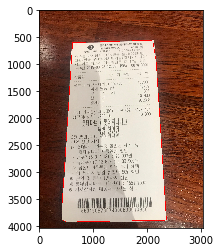

True

In [238]:
cnt = contours[0]
peri = cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,0.002* peri, True)
print(approx)
cv2.drawContours(roi, [approx], -1, (0, 0, 255), 10)

imshow("", roi)
cv2.imwrite("out.jpg",roi)

In [ ]:
thresh = cv2.adaptiveThreshold(gray_blur, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 45, 6)

imshow("", thresh)
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh,
                          cv2.MORPH_CLOSE,
                          kernel,
                          iterations=5)
imshow("", closing)
cont_img = closing.copy()
contours, _ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0,255,0), 2)
    
imshow("", img)
imshow("out", thresh)
imshow("out", cont_img)
imshow("out", roi)